In [3]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [4]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")

d1 = date.today() - timedelta(days=1460)
start_date = d1.strftime("%Y-%m-%d")

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
df = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

           Date        Open        High         Low       Close   Adj Close  \
1000 2023-11-27  137.570007  139.630005  137.539993  138.050003  138.050003   
1001 2023-11-28  137.630005  138.660004  137.039993  138.619995  138.619995   
1002 2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
1003 2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
1004 2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   

        Volume  
1000  17886400  
1001  17046900  
1002  21014700  
1003  29913500  
1004  24258400  


In [22]:
df = df[["Date", "Close"]]
print(df.head())


           Date       Close
0    2019-12-05   66.406502
1    2019-12-06   67.030998
2    2019-12-09   67.178001
3    2019-12-10   67.233002
4    2019-12-11   67.250999
...         ...         ...
1000 2023-11-27  138.050003
1001 2023-11-28  138.619995
1002 2023-11-29  136.399994
1003 2023-11-30  133.919998
1004 2023-12-01  133.320007

[1005 rows x 2 columns]


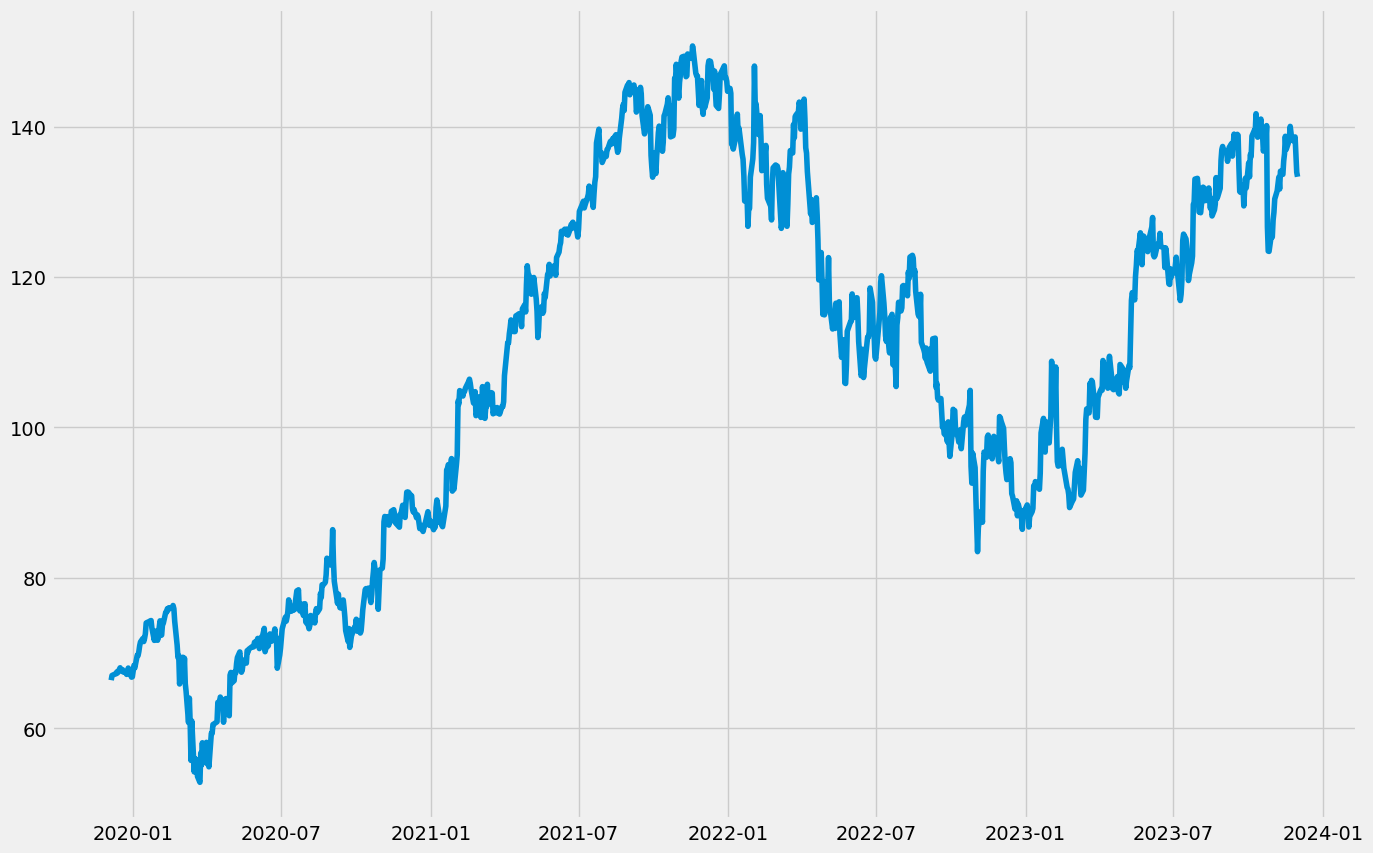

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Close"])

<Figure size 640x480 with 0 Axes>

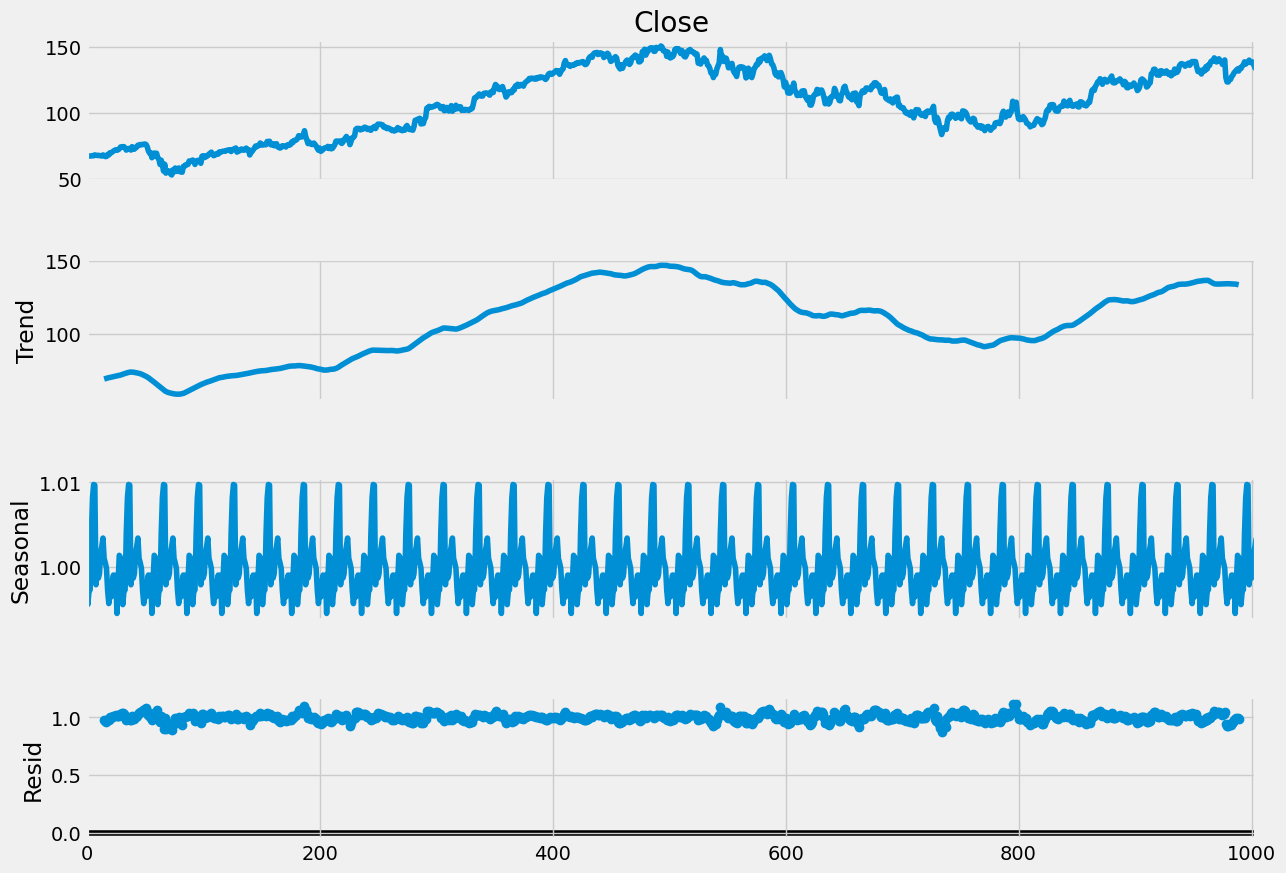

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

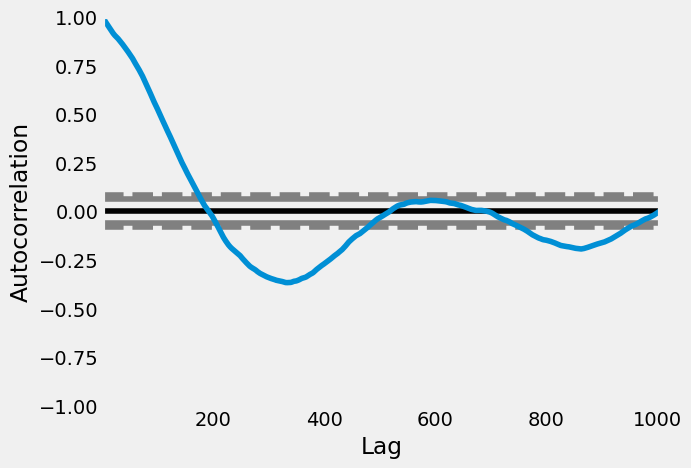

In [14]:
pd.plotting.autocorrelation_plot(df["Close"])

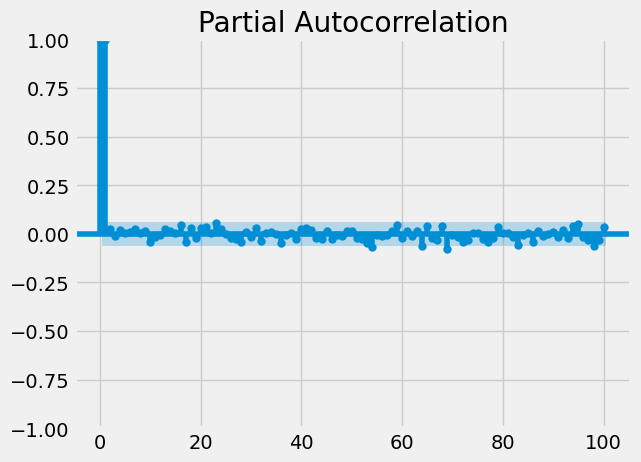

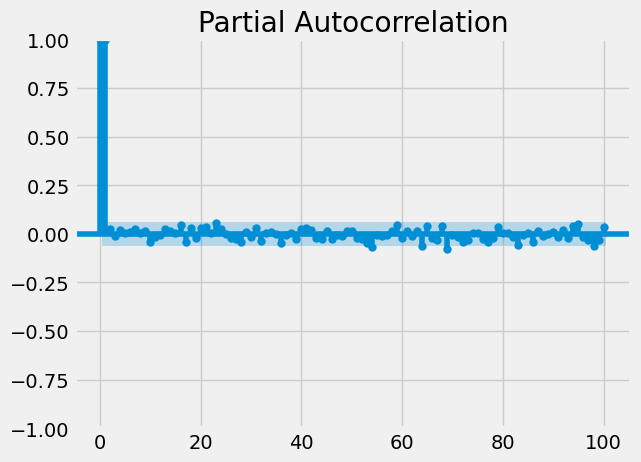

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

In [16]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2181.499
Date:                Mon, 04 Dec 2023   AIC                           4378.997
Time:                        03:31:08   BIC                           4418.291
Sample:                             0   HQIC                          4393.929
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4032      0.030     46.199      0.000       1.344       1.463
ar.L2         -0.9118      0.049    -18.671      0.000      -1.008      -0.816
ar.L3         -0.0832      0.056     -1.493      0.1

C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1        66.406489
2        67.003920
3        67.170925
4        67.202052
           ...    
1000    138.743974
1001    138.501724
1002    138.905434
1003    136.378539
1004    133.618341
Name: predicted_mean, Length: 1005, dtype: float64


In [18]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1005
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -2186.976
Date:                            Mon, 04 Dec 2023   AIC                           4403.953
Time:                                    03:38:31   BIC                           4477.448
Sample:                                         0   HQIC                          4431.897
                                           - 1005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2373      3.689      0.064      0.949      -6.992       7.467
ar.L2          0.2309      2.664   

In [20]:
# Generate predictions using the SARIMAX model

start_date = (df["Date"].iloc[-1] + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
date_range = pd.date_range(start=start_date, periods=50, freq="D")
predictions = model.predict(len(df), len(df) + 49)
                            
predictions.index = date_range
print(predictions)

2023-12-02    133.491160
2023-12-03    133.506110
2023-12-04    134.078698
2023-12-05    134.307708
2023-12-06    134.289365
2023-12-07    134.577905
2023-12-08    134.934730
2023-12-09    135.397705
2023-12-10    135.057762
2023-12-11    134.869032
2023-12-12    134.750507
2023-12-13    134.369322
2023-12-14    134.484280
2023-12-15    134.651300
2023-12-16    134.895224
2023-12-17    134.984147
2023-12-18    135.213207
2023-12-19    135.212683
2023-12-20    135.624457
2023-12-21    135.957490
2023-12-22    135.656992
2023-12-23    136.133934
2023-12-24    136.177331
2023-12-25    135.970403
2023-12-26    135.776642
2023-12-27    135.930758
2023-12-28    136.264318
2023-12-29    136.322659
2023-12-30    136.419604
2023-12-31    136.553057
2024-01-01    136.967997
2024-01-02    137.320370
2024-01-03    137.237706
2024-01-04    137.062236
2024-01-05    136.906576
2024-01-06    136.556209
2024-01-07    136.491267
2024-01-08    136.419613
2024-01-09    136.875244
2024-01-10    136.926422


C:\Users\Vanshul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


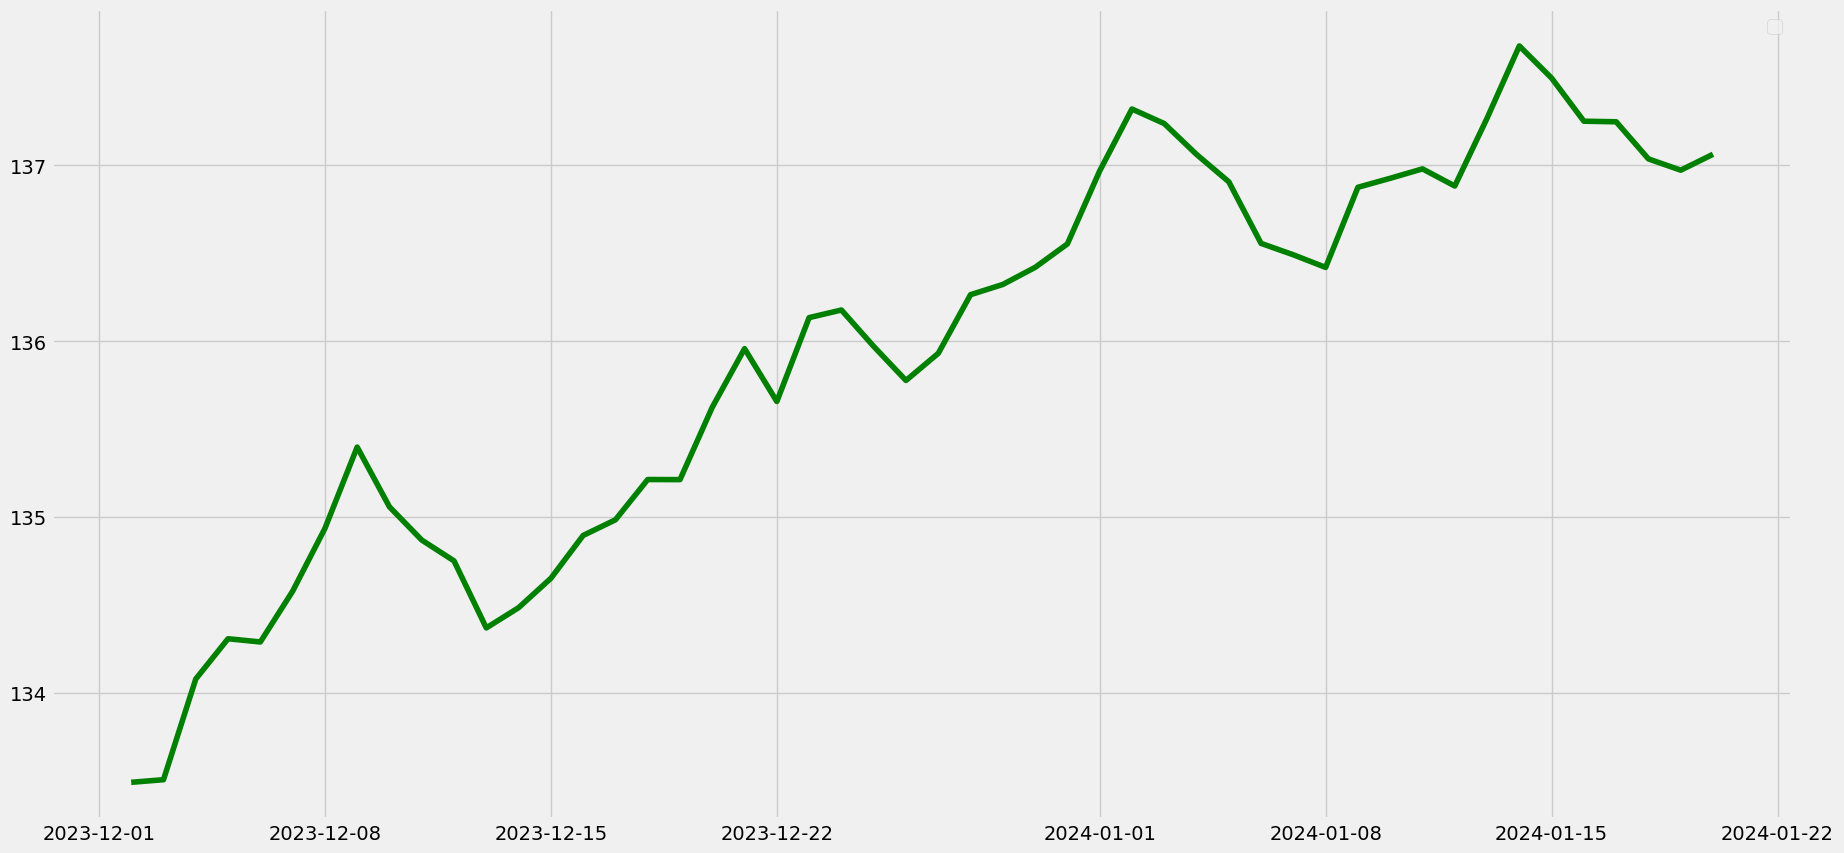

In [25]:
plt.figure(figsize=(20, 10))
# plt.plot(df["Date"], df["Close"])
plt.plot(predictions, color="green")
plt.legend()
plt.show()

In [29]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
test=pd.read_csv("../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv")



# print(predictions.head(50))

mape = np.mean(np.abs((predictions-test['Close']) / test['Close'])) * 100
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))

# Calculate MAE (Mean Absolute Error)

mae = mean_absolute_error(test['Close'], predictions)

print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

ValueError: Found input variables with inconsistent numbers of samples: [242, 50]